In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv("../input/smart-agricultural-production-optimizing-engine/Crop_recommendation.csv")
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [4]:
df.shape

(2200, 8)

In [5]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


#### There are outliers present in the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
# To check for duplicates
df.duplicated().sum()
#No duplicates present

0

In [9]:
#Renaming columns
df.columns = ['Nitrogen','Phosphorus','Potassium','Temperature','Humidity','pH','Rainfall','Label']

<h1><b><span style='color:#19d063;'>|</span> EDA - Exploratory Data Analysis</b></h1>

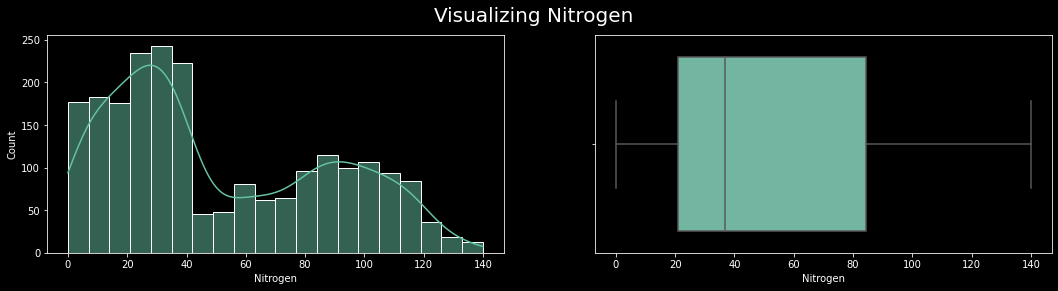

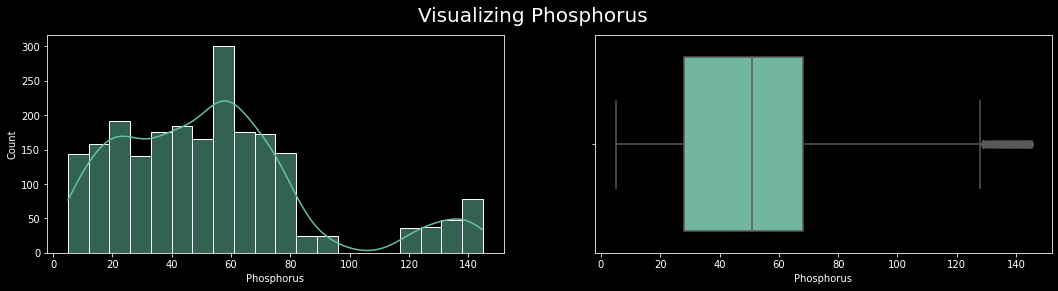

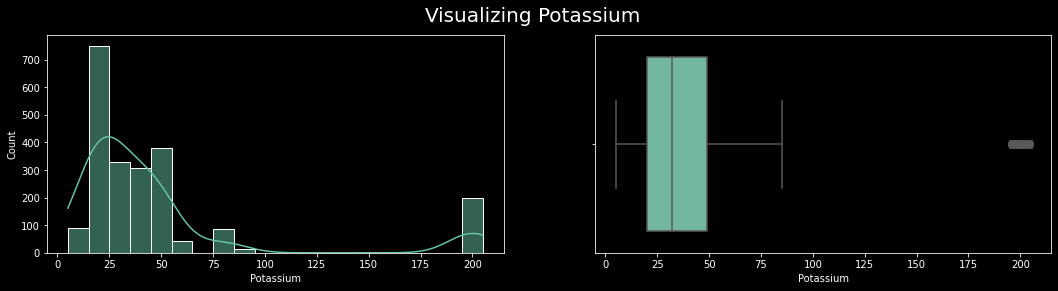

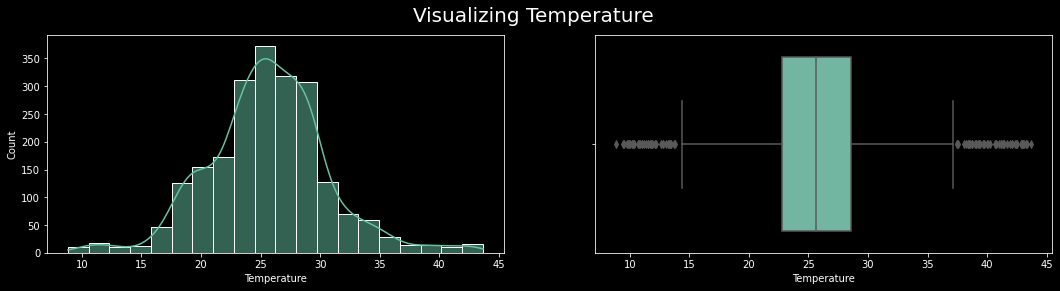

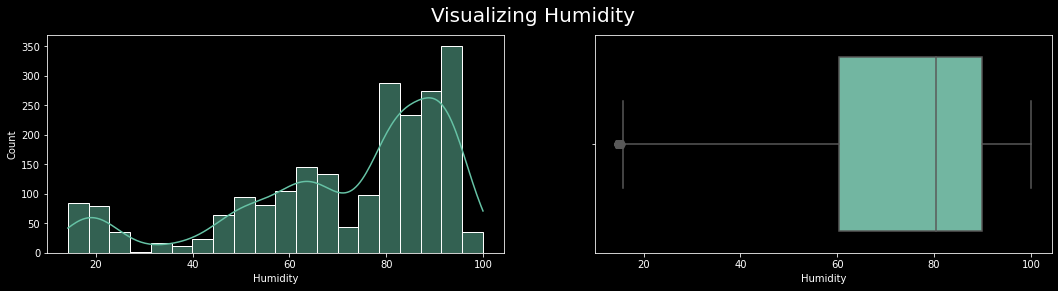

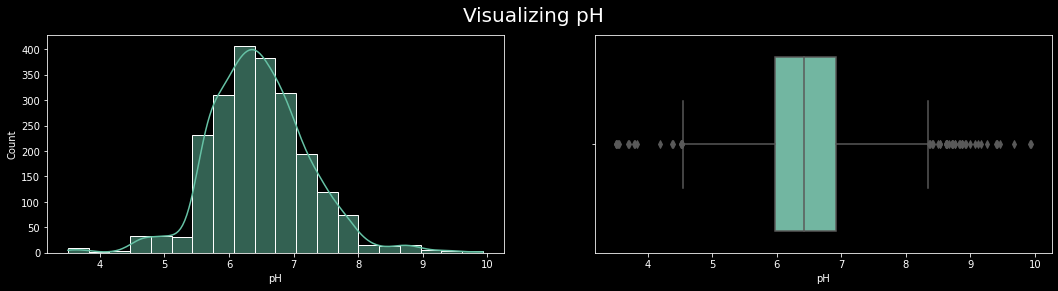

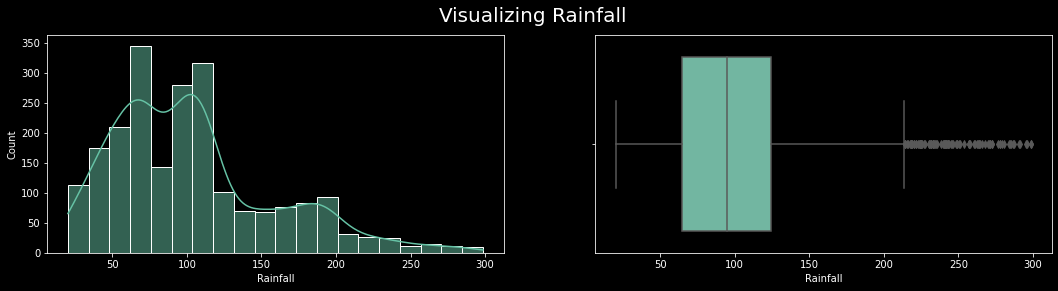

In [13]:
plt.style.use('dark_background')
sns.set_palette("Set2")
for i in df.columns[:-1]:
    fig,ax=plt.subplots(1,2,figsize=(18,4))
    sns.histplot(data=df,x=i,kde=True,bins=20,ax=ax[0])
#     sns.violinplot(data=df,x=i,ax=ax[1])
    sns.boxplot(data=df,x=i,ax=ax[1])
    plt.suptitle(f'Visualizing {i}',size=20)

#### These graphs confirm that there are outliers present in the data. Also it helps us understand the overall distribution of the dataset

In [14]:
grouped = df.groupby(by='Label').mean().reset_index()
grouped

,Label,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
0,apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
1,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
2,blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
5,coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
6,cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
7,grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
8,jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
9,kidneybeans,20.75,67.54,20.05,20.115085,21.605357,5.749411,105.919778


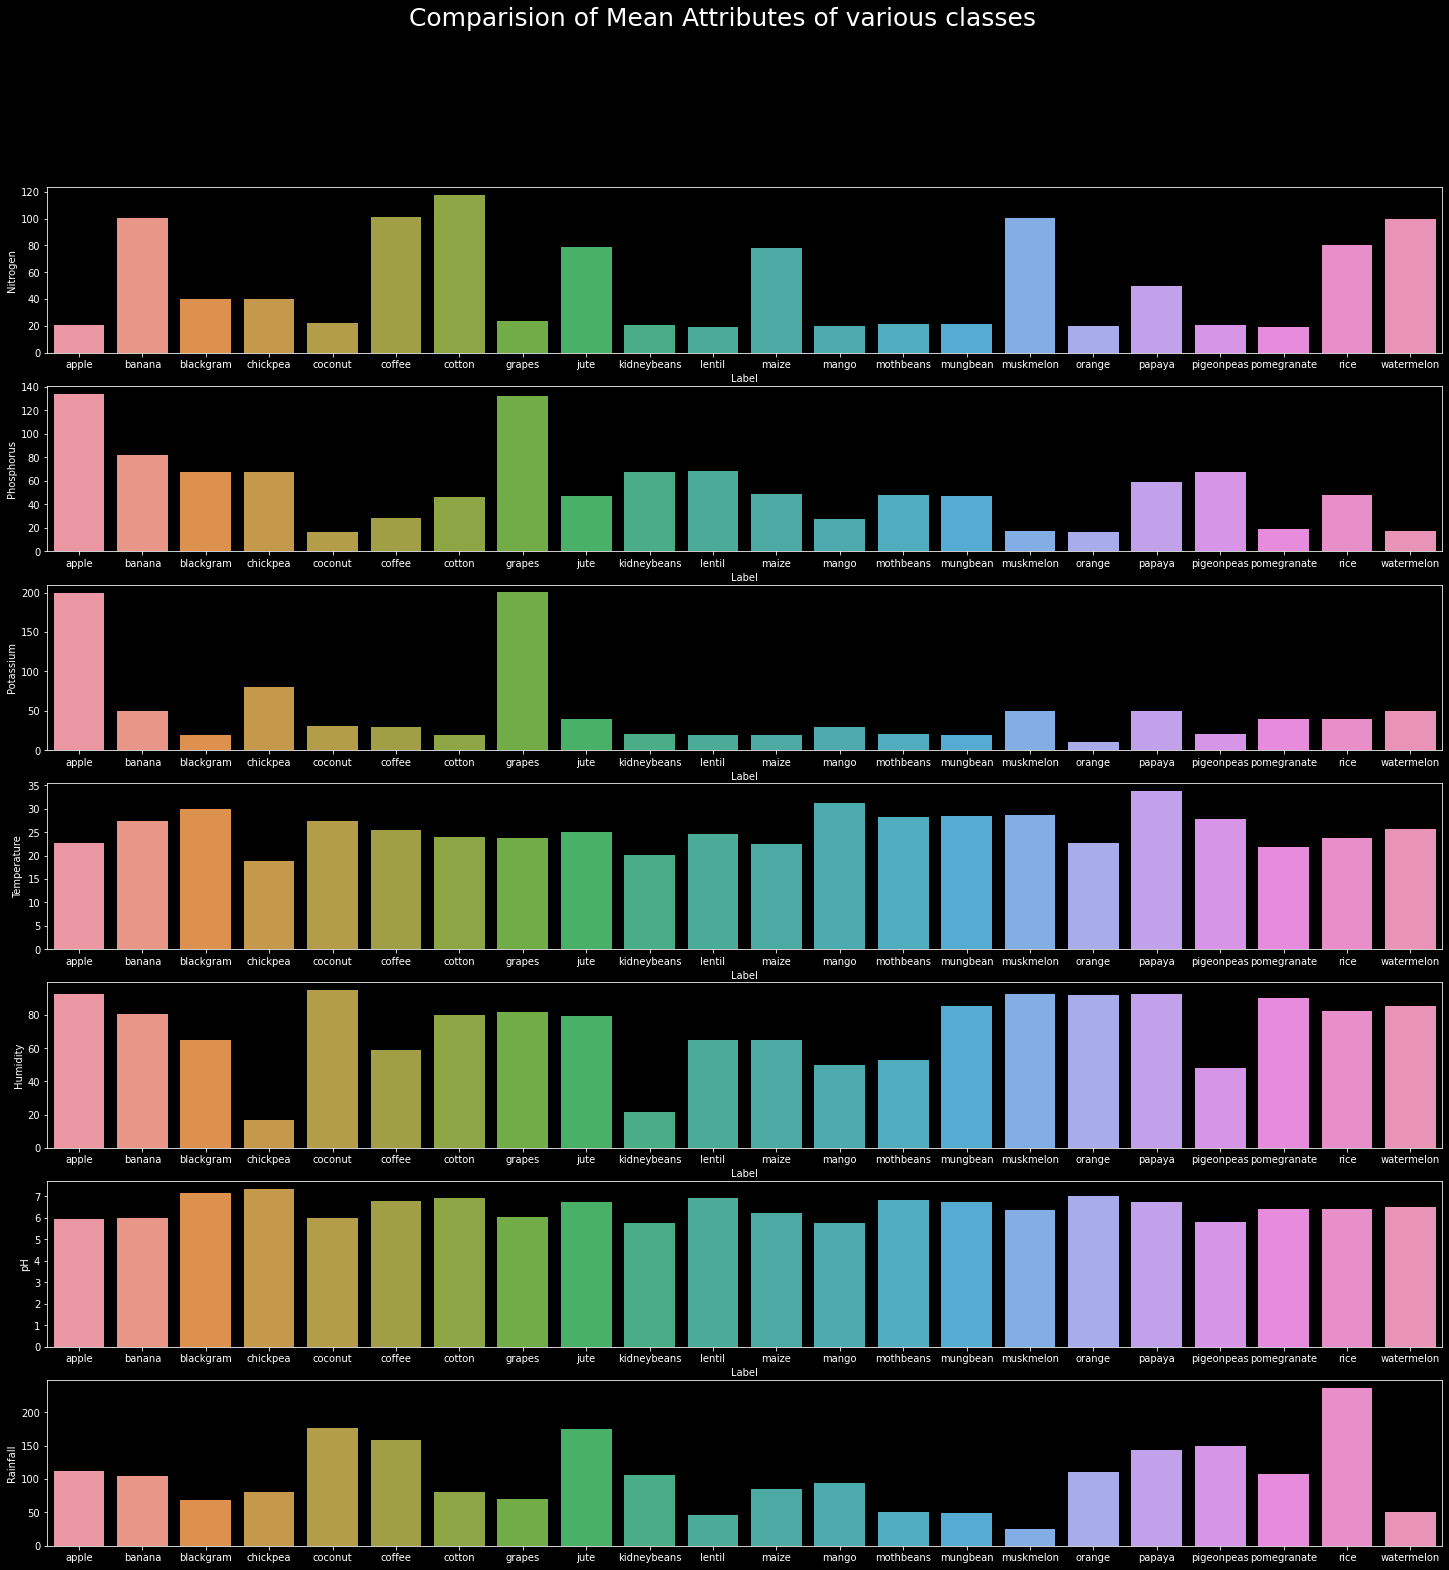

In [15]:
fig,ax=plt.subplots(7,1,figsize=(25,25))
for index,i in enumerate(grouped.columns[1:]):
    sns.barplot(data=grouped,x='Label',y=i,ax=ax[index])
    plt.suptitle("Comparision of Mean Attributes of various classes",size=25)
    plt.xlabel("")

#### Observations:
* Cotton requires most Nitrogen.
* Apple requires most Phosphorus.
* Grapes require most Potassium.
* Papaya requires a hot climate.
* Coconut requires a humid climate.
* Chickpea requires high pH in soil.
* Rice requires huge amount of Rainfall.
---------------------------------------------
### Top 5 most and Top 5 Least requiring crops :

In [16]:
print(f'--------------------------------')
for i in grouped.columns[1:]:
    print(f'Top 5 Most {i} requiring crops:')
    print(f'--------------------------------')
    for j ,k in grouped.sort_values(by=i,ascending=False)[:5][['Label',i]].values:
        print(f'{j} --> {k}')
    print(f'-------------------------------')

--------------------------------
Top 5 Most Nitrogen requiring crops:
--------------------------------
cotton --> 117.77
coffee --> 101.2
muskmelon --> 100.32
banana --> 100.23
watermelon --> 99.42
-------------------------------
Top 5 Most Phosphorus requiring crops:
--------------------------------
apple --> 134.22
grapes --> 132.53
banana --> 82.01
lentil --> 68.36
chickpea --> 67.79
-------------------------------
Top 5 Most Potassium requiring crops:
--------------------------------
grapes --> 200.11
apple --> 199.89
chickpea --> 79.92
watermelon --> 50.22
muskmelon --> 50.08
-------------------------------
Top 5 Most Temperature requiring crops:
--------------------------------
papaya --> 33.7238587388
mango --> 31.2087701513
blackgram --> 29.9733396789
muskmelon --> 28.663065756
mungbean --> 28.5257747353
-------------------------------
Top 5 Most Humidity requiring crops:
--------------------------------
coconut --> 94.84427180610001
papaya --> 92.4033876826
muskmelon --> 92.34

In [17]:
print(f'--------------------------------')
for i in grouped.columns[1:]:
    print(f'Top 5 Least {i} requiring crops:')
    print(f'--------------------------------')
    for j ,k in grouped.sort_values(by=i)[:5][['Label',i]].values:
        print(f'{j} --> {k}')
    print(f'-------------------------------')

--------------------------------
Top 5 Least Nitrogen requiring crops:
--------------------------------
lentil --> 18.77
pomegranate --> 18.87
orange --> 19.58
mango --> 20.07
pigeonpeas --> 20.73
-------------------------------
Top 5 Least Phosphorus requiring crops:
--------------------------------
orange --> 16.55
coconut --> 16.93
watermelon --> 17.0
muskmelon --> 17.72
pomegranate --> 18.75
-------------------------------
Top 5 Least Potassium requiring crops:
--------------------------------
orange --> 10.01
blackgram --> 19.24
lentil --> 19.41
cotton --> 19.56
maize --> 19.79
-------------------------------
Top 5 Least Temperature requiring crops:
--------------------------------
chickpea --> 18.8728467519
kidneybeans --> 20.1150846851
pomegranate --> 21.837841721999997
maize --> 22.3892039102
apple --> 22.6309424132
-------------------------------
Top 5 Least Humidity requiring crops:
--------------------------------
chickpea --> 16.8604394237
kidneybeans --> 21.6053567295
pige

In [21]:
# sns.pairplot(data=df,hue='Label')
# plt.show()

<AxesSubplot:>

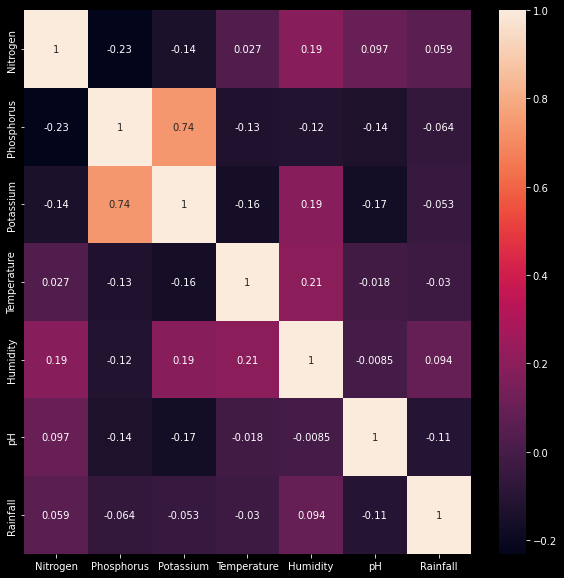

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

##### A <mark>strong positive correlation</mark> between Potassium and Phosphorus is observed.

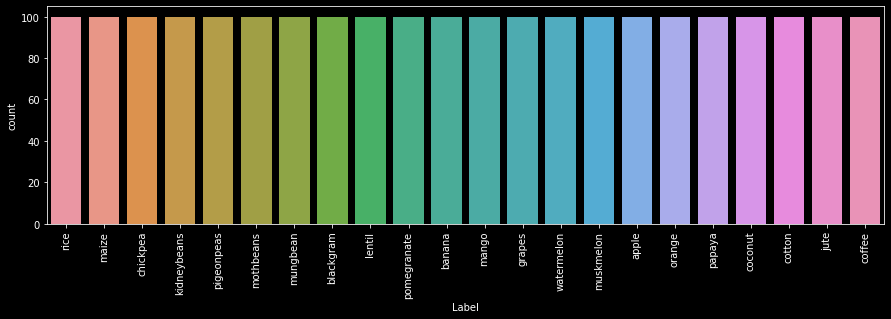

In [22]:
plt.figure(figsize=(15,4))
sns.countplot(data=df,x='Label')
plt.xticks(rotation = 90)
plt.show()

<h1><b><span style='color:#19d063;'>|</span> Data Preprocessing</b></h1>

In [23]:
#would be required in future to get the names of crops back from encoded form
names = df['Label'].unique()

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Label']=encoder.fit_transform(df['Label'])
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [26]:
X=df.drop(['Label'],axis=1)
y=df['Label']

In [27]:
#Splitting into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle = True, random_state = 42,stratify=y)

##### Parameters and its use:
* test_size = Denotes what proportion of total samples should be given to testing set - Here 30%.
* shuffle - The dataset contains all the classes and its samples one after one. So it is necessary to shuffle the dataset to avoid any bias.
* random_state - To produce replicable results.
### Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_train.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
0,-1.335936,0.417499,-0.535091,0.378274,-0.489416,0.105457,-1.006138
1,1.797538,0.874355,-0.061709,-0.056432,0.352421,-1.102431,0.037615
2,-1.308923,0.234757,-0.554816,-0.672000,-2.173304,-0.662710,-0.486121
3,-0.282441,0.752527,-0.554816,-1.248506,-2.271540,-1.031842,-0.422218
4,-1.173860,-1.013983,-0.712610,-1.765899,1.047107,0.007107,0.121738


In [29]:
X_test=scaler.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X.columns)
X_test.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
0,-1.065809,0.752527,-0.515367,-0.328943,-2.185815,-0.682134,0.169358
1,-1.038796,-0.435299,-0.535091,0.665518,-0.385148,2.209376,-0.598399
2,-0.741657,0.112928,-0.574540,1.416190,-0.154494,1.006982,-0.545022
3,0.257813,0.143385,-0.219503,0.108439,0.344686,-0.518753,1.239871
4,0.446902,-0.374384,-0.160330,0.051858,0.735100,1.112860,0.896488


<h1><b><span style='color:#19d063;'>|</span> Model Building</b></h1>

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | KNeighborsClassifier - 98%</b></p>
</div>

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# knn_scores=[]
# for k in range(1,20):
#     knn=KNeighborsClassifier(n_neighbors=k)
#     scores=cross_val_score(knn,X_train,y_train,cv=5)
#     knn_scores.append(scores.mean())

# x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# x_labels = x_ticks

# plt.plot([k for k in range(1,20)],knn_scores)
# plt.xticks(ticks=x_ticks, labels=x_labels)
# plt.grid()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       0.93      0.93      0.93        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       0.94      1.00      0.97        30
           7       1.00      1.00      1.00        30
           8       0.86      1.00      0.92        30
           9       0.97      1.00      0.98        30
          10       0.90      0.90      0.90        30
          11       1.00      0.93      0.97        30
          12       0.97      1.00      0.98        30
          13       0.97      0.93      0.95        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
          17       1.00    

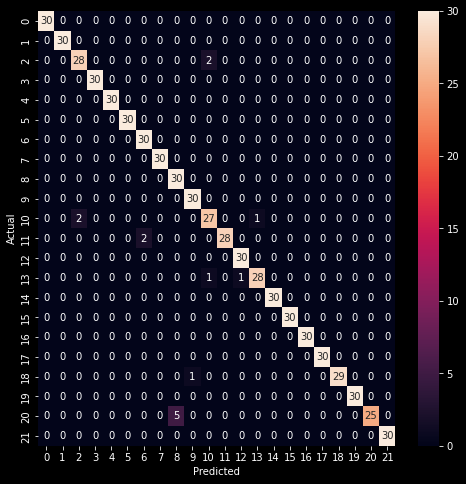

In [35]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Support Vector Classifier - 99%</b></p>
</div>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       0.97      1.00      0.98        30
           7       1.00      1.00      1.00        30
           8       0.91      1.00      0.95        30
           9       1.00      1.00      1.00        30
          10       1.00      0.97      0.98        30
          11       1.00      0.97      0.98        30
          12       1.00      1.00      1.00        30
          13       0.97      1.00      0.98        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
          17       1.00    

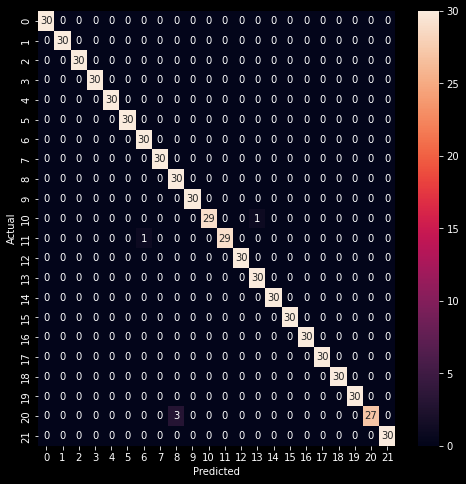

In [36]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)
confusion_svc=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Logistic Regression -99%</b></p>
</div>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       0.97      1.00      0.98        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       0.97      1.00      0.98        30
           7       1.00      1.00      1.00        30
           8       0.88      0.97      0.92        30
           9       1.00      1.00      1.00        30
          10       0.97      0.97      0.97        30
          11       1.00      0.97      0.98        30
          12       1.00      1.00      1.00        30
          13       0.97      0.97      0.97        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
          17       1.00    

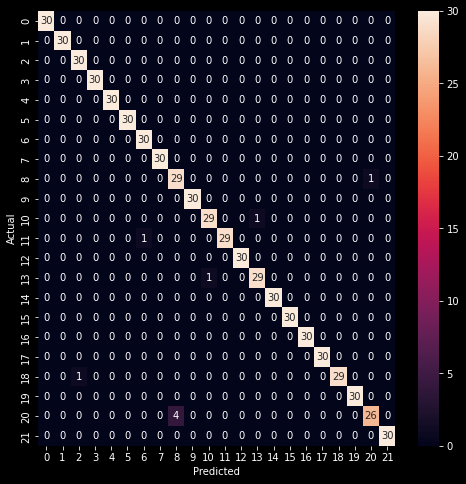

In [37]:
import warnings 
warnings.filterwarnings('ignore')
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[50,75,100,200,300,400,500,700]}
log=RandomizedSearchCV(LogisticRegression(solver='lbfgs'),param_grid,cv=5)
log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)
confusion_log=confusion_matrix(y_test,log.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_log,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_log))

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Random Forest Classifier - 99%</b></p>
</div>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       1.00      0.97      0.98        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.94      1.00      0.97        30
           9       1.00      1.00      1.00        30
          10       1.00      0.97      0.98        30
          11       0.97      1.00      0.98        30
          12       1.00      1.00      1.00        30
          13       0.97      1.00      0.98        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
          17       1.00    

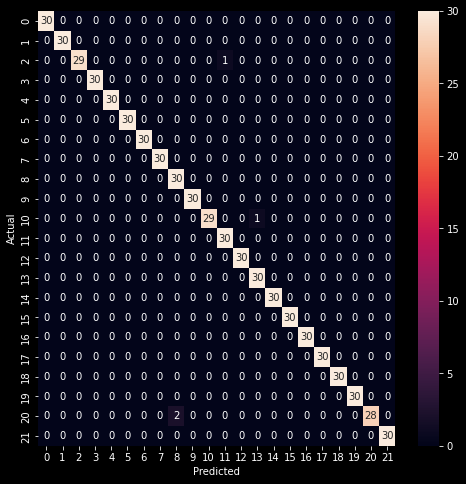

In [38]:
param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
confusion_rcv=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_rcv))

<h1><b><span style='color:#19d063;'>|</span> Conclusion</b></h1>

## Model  - KNN
> Accuracy on test set ~ 98%
## Model  - SVM
> Accuracy on test set ~ 99%
## Model  - Logistic Regression
> Accuracy on test set ~ 99%
## Model  - Random Forest Classifier
> Accuracy on test set ~ 99%